### Import, pickle and comparison of 4 sets of initiation rates

In [4]:
import matplotlib as mpl
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)
%matplotlib inline

import os.path
import pandas as pd
import numpy as np
import scipy.stats
import cPickle as pkl
import csv
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

datadir = "../../data"

#### Initiation rates according to Shah, Plotkin et al. (http://www.ncbi.nlm.nih.gov/pubmed/23791185) (first version):

In [5]:
import math

V = 4.2e-17           # m^3 # cell volume
lambda_ribo = 3e-8                         # m # characteristic length ribosomes
D_ribo = 3e-13                             # m^2/s # diffusion coefficient of ribosomes
tau_ribo = lambda_ribo ** 2 / 6. / D_ribo  # s # char. time for ribosomes
num_pos_ribo = V / lambda_ribo ** 3        # number of discrete positions for ribosomes

In [6]:
file_plotkin = r"Plotkin_calc_IP_output.txt"
filepath_plotkin = os.path.join(datadir, file_plotkin)

with open(filepath_plotkin, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_plotkin = {elem[0]: float(elem[-1].strip()) / tau_ribo / num_pos_ribo
                          for elem in content if float(elem[-1].strip())>1E-80}

In [7]:
pd.Series(init_rates_plotkin).describe()

count    5.151000e+03
mean     1.951797e-06
std      3.877020e-06
min      4.593294e-09
25%      5.572144e-07
50%      1.071976e-06
75%      2.048380e-06
max      1.788067e-04
dtype: float64

#### Initiation rates according to Ciandrini, Stansfield et al. (2013) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002866):

In [8]:
file_stansfield = r"p_init_Table_S1.csv"
filepath_stansfield = os.path.join(datadir, file_stansfield)
init_rates_stansfield = {}

with open(filepath_stansfield, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    for rows in reader:
        try:
            init_rates_stansfield[rows[0]] = float(rows[6].replace(',','.')) 
            # The initation rates from Ciandrini, Stansfield, Romano (2013) contain the ribosome availability
        except:
            pass

In [9]:
pd.Series(init_rates_stansfield).describe()

count    5841.000000
mean        0.120587
std         0.143086
min         0.004870
25%         0.055800
50%         0.090390
75%         0.138970
max         4.198550
dtype: float64

Function to plot two dictionaries by their values:

In [10]:
def scatter_dicts(dict1, dict2):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel('Stansfield initiation rates')
    #ax.set_ylabel('Plotkin initiation rates')

    scat = plt.scatter(xs, ys)
    scat.set_alpha(0.2)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

4874


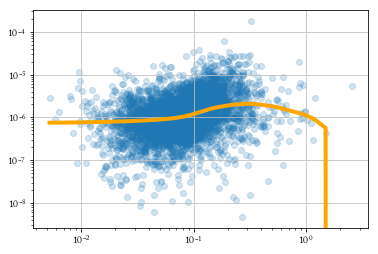

In [11]:
scatter_dicts(init_rates_stansfield, init_rates_plotkin)

#### Initiation rates according to Siwiak et al. (2010) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [12]:
file_siwiak = r'journal.pcbi.1000865.s003.CSV'
filepath_siwiak = os.path.join(datadir, file_siwiak)

with open(filepath_siwiak, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_siwiak = {elem[0]: float(elem[7]) for elem in content}
    orf_lengths = {elem[0]: float(elem[1]) for elem in content} # length of the transcript CDS in codons

In [13]:
pd.Series(init_rates_siwiak).describe()

count    4.621000e+03
mean     6.242752e-05
std      7.948070e-05
min      1.489429e-07
25%      2.023577e-05
50%      3.743325e-05
75%      7.006027e-05
max      8.783121e-04
dtype: float64

4420


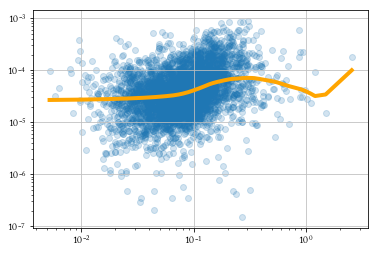

In [14]:
scatter_dicts(init_rates_stansfield, init_rates_siwiak)

4512


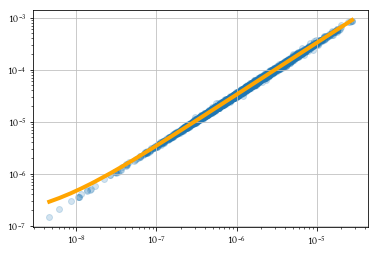

In [15]:
scatter_dicts(init_rates_plotkin, init_rates_siwiak)

Plot correlation between orf lengths and initiation rates:

In [16]:
pd.Series(orf_lengths).describe()

count    4621.000000
mean      519.238909
std       374.253029
min        37.000000
25%       270.000000
50%       433.000000
75%       664.000000
max      4911.000000
dtype: float64

4512


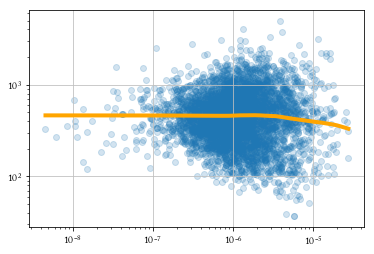

In [17]:
scatter_dicts(init_rates_plotkin, orf_lengths)

4621


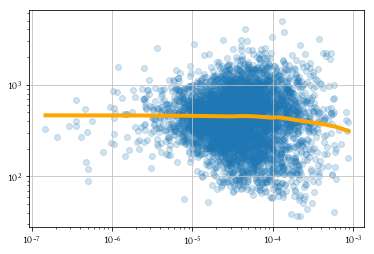

In [18]:
scatter_dicts(init_rates_siwiak, orf_lengths)

4420


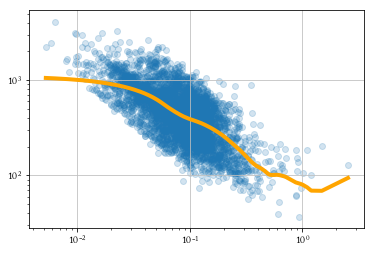

In [19]:
scatter_dicts(init_rates_stansfield, orf_lengths)

#### Initiation rates according to Plotkin et al. (private email from 17 June 2015):

In [20]:
file_plotkin2 = r"ingolia_recomputed_IPs.txt"
filepath_plotkin2 = os.path.join(datadir, file_plotkin2)

with open(filepath_plotkin2, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_rates_plotkin2 = {elem[0]: float(elem[5].strip()) / tau_ribo / num_pos_ribo
                           for elem in content if float(elem[5].strip())>1E-80}

In [21]:
pd.Series(init_rates_plotkin2).describe()

count    2.569000e+03
mean     2.468432e-06
std      3.943070e-06
min      8.973148e-08
25%      7.294157e-07
50%      1.284344e-06
75%      2.631287e-06
max      7.886130e-05
dtype: float64

2569


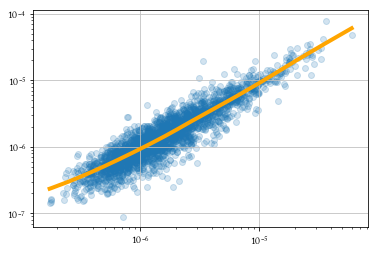

In [22]:
scatter_dicts(init_rates_plotkin, init_rates_plotkin2)

The error leads to a rather mild modification of initiation rates.

#### Third version of initiation rates sent by Premal Shah (private email, Sept 30, 2015):

In [23]:
file_plotkin3 = r"weinberg_etal_data.tsv"
filepath_plotkin3 = os.path.join(datadir, file_plotkin3)

with open(filepath_plotkin3, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_rates_plotkin3 = {elem[0]: float(elem[5].strip()) / tau_ribo / num_pos_ribo
                           for elem in content if float(elem[5].strip())>1E-80}

In [24]:
pd.Series(init_rates_plotkin3.values()).describe()

count    4.839000e+03
mean     1.567727e-06
std      1.128263e-06
min      9.375766e-10
25%      8.320521e-07
50%      1.291872e-06
75%      1.962904e-06
max      1.440641e-05
dtype: float64

Test to see whether this worked (take values directly, no translation to rates):

In [25]:
with open(filepath_plotkin3, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_probs_plotkin3 = {elem[0]: float(elem[5].strip())
                           for elem in content if float(elem[5].strip())>1E-80}

In [26]:
pd.Series(init_probs_plotkin3.values()).describe()

count    4.839000e+03
mean     1.219343e-03
std      8.775381e-04
min      7.292263e-07
25%      6.471517e-04
50%      1.004789e-03
75%      1.526703e-03
max      1.120499e-02
dtype: float64

There seems to be one outlier, and the rest of the distribution is much narrower than in previous deliveries by the Plotkin group.

4839


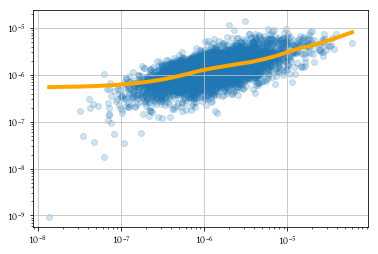

2569


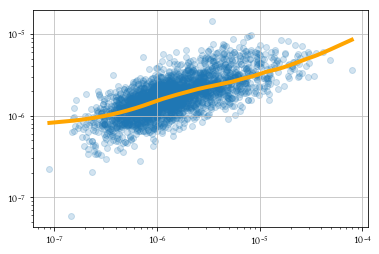

In [27]:
scatter_dicts(init_rates_plotkin, init_rates_plotkin3)
scatter_dicts(init_rates_plotkin2, init_rates_plotkin3)

In [28]:
pkl.dump(init_rates_stansfield, open("../../parameters/init_rates_stansfield.p", "wb"))
pkl.dump(init_rates_plotkin, open("../../parameters/init_rates_plotkin_old_1.p", "wb"))
pkl.dump(init_rates_plotkin2, open("../../parameters/init_rates_plotkin_old_2.p", "wb"))
pkl.dump(init_rates_plotkin3, open("../../parameters/init_rates_plotkin.p", "wb"))
pkl.dump(init_rates_siwiak, open("../../parameters/init_rates_siwiak.p", "wb"))

#### Create "enhanced" init rates by filling in the median:

In [29]:
median_init_rate = np.median(init_rates_plotkin3.values())

All ORF names:

In [30]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [31]:
len(orf_genomic_dict)

6713

In [32]:
init_rates_enhanced_median = {key: init_rates_plotkin3[key] if key in init_rates_plotkin3 else median_init_rate 
                              for key in orf_genomic_dict}

In [33]:
pkl.dump(init_rates_enhanced_median, open("../../parameters/init_rates_enhanced_median.p", "wb"))

### All in one scatter matrix

In [34]:
df1 = pd.DataFrame.from_dict(init_rates_plotkin.items())
df1.columns = ['name', '$p_\mathrm{Shah}$']

df2 = pd.DataFrame.from_dict(init_rates_stansfield.items())
df2.columns = ['name', '$p_\mathrm{Ciandrini}$']

df3 = pd.DataFrame.from_dict(init_rates_siwiak.items())
df3.columns = ['name', '$p_\mathrm{Siwiak}$']

df4 = pd.DataFrame.from_dict(init_rates_plotkin3.items())
df4.columns = ['name', '$p_\mathrm{Weinberg}$']

In [35]:
df = pd.merge(df1, df2, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df3, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df4, left_on='name', right_on='name', how='outer')

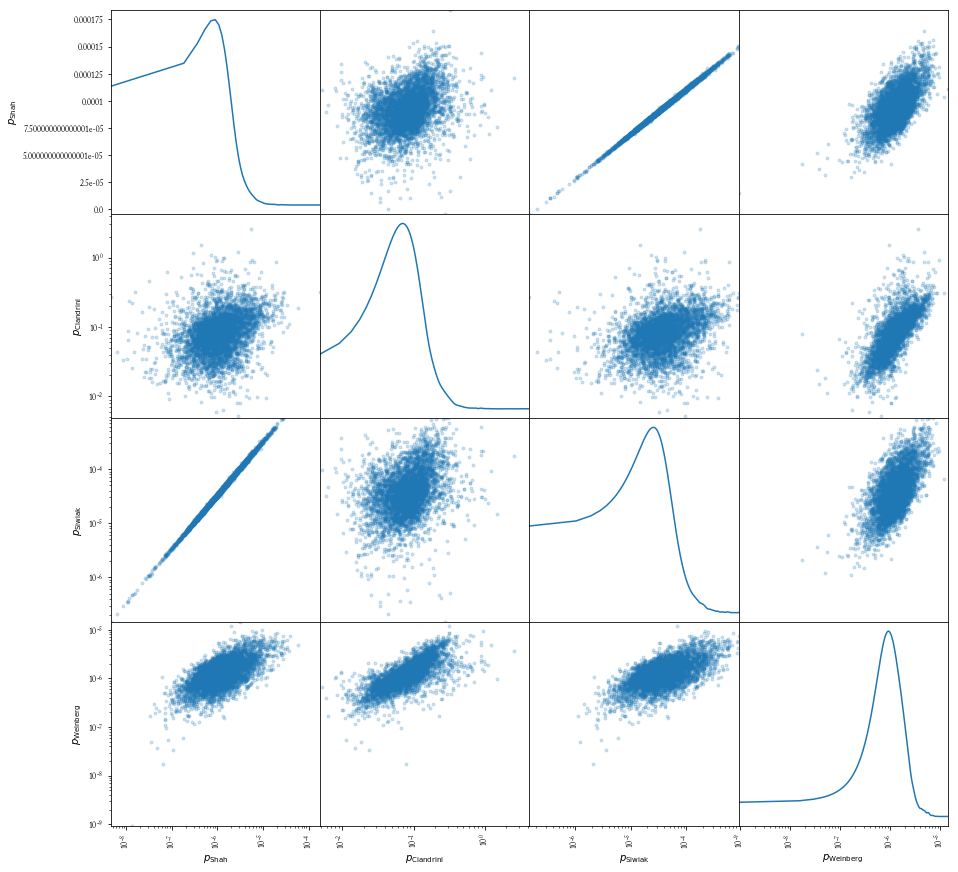

In [36]:
axl = pd.scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        #mini = max(0.000000001, df[df.columns[i+1]].min())
        #minj = max(0.000000001, df[df.columns[j+1]].min())
        mini = df[df.columns[i+1]].min()
        minj = df[df.columns[j+1]].min()
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log')            

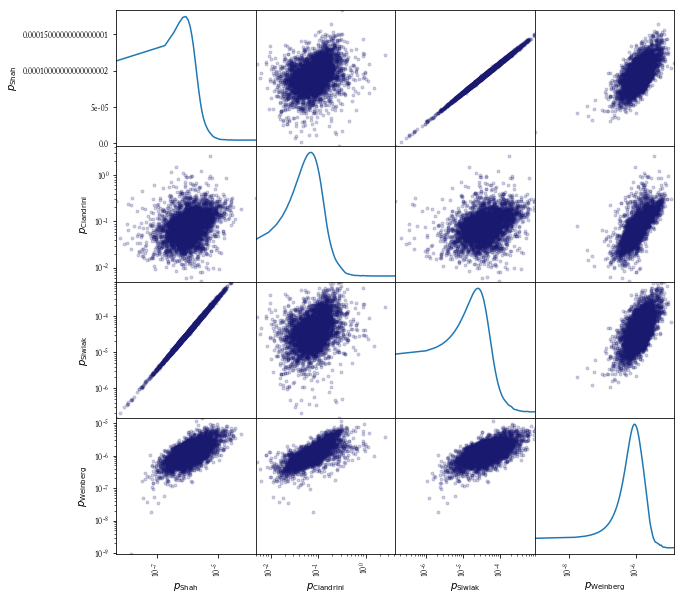

In [37]:
axl = pd.scatter_matrix(df, c='midnightblue', alpha=0.2, figsize=(10, 10), diagonal='kde', rasterized=True)

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = df[df.columns[i+1]].min()
        minj = df[df.columns[j+1]].min()
        if i != j:  # only the scatter plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log') 
            
plt.savefig('init_rates_scatter_matrix.pgf')

In [38]:
siwiak_plotkin_ratios = {key: init_rates_siwiak[key]/init_rates_plotkin[key] for key in init_rates_plotkin if key in init_rates_siwiak}

In [39]:
np.mean(siwiak_plotkin_ratios.values())

33.43839907231709

In [40]:
df = df[df.columns[1:]]  # get rid of the names column

In [44]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'
fontsize = 18

https://stackoverflow.com/questions/14207708/ioerror-errno-32-broken-pipe-python

In [42]:
from signal import signal, SIGPIPE, SIG_DFL
signal(SIGPIPE, SIG_DFL) 

0

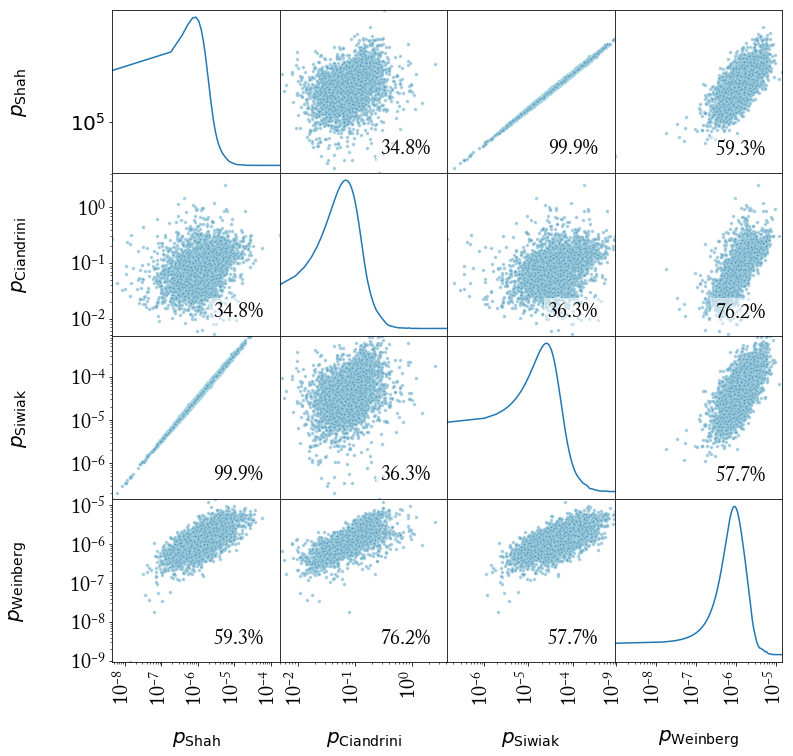

In [46]:
axl = pd.scatter_matrix(df, c=myfacecolor, edgecolor=myedgecolor, alpha=0.5, figsize=(12, 12), diagonal='kde',
                        rasterized=True)

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = df[df.columns[i]].min()
        minj = df[df.columns[j]].min()
        if i != j:  # only the scatter plots
            ax.set_xlim([minj, df[df.columns[j]].max()]) 
            ax.set_ylim([mini, df[df.columns[i]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
            # calculate correlation
            corr = scipy.stats.spearmanr(np.array(df.iloc[:, i]), np.array(df.iloc[:, j]), nan_policy='omit')[0]
            displaytext = '{:.1%}'.format(corr)
            # plot correlation on canvas
            t = ax.text(0.90, 0.08, displaytext, verticalalignment='bottom', horizontalalignment='right', 
                    transform=ax.transAxes, fontsize=11, backgroundcolor='white', size=fontsize)
            t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j]].max()])
            ax.set_xscale('log') 

        # manually edit axes:
        if i==0: # TODO: FIXME: hack!
            #xfmt = mpl.ticker.ScalarFormatter(useMathText=True)
            #xfmt.set_powerlimits((-6, -4))  # Or whatever your limits are . . .
            #ax.yaxis.set_major_formatter(xfmt)
            #ax.set_yscale('linear')
            #def y_fmt(x, y):
            #    return '{:2.2e}'.format(x).replace('e', ' 10^')
            #ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))
            #ax.ticklabel_format(useMathText=True)
            #plt.ticklabel_format(style='sci', axis='y')
            ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
            ax.get_yaxis().get_major_formatter().set_scientific(True)
            yticks = [1e5]
            ax.set_yticks(yticks)
            a = ax.get_yticks().tolist()
            a[0] = '$\mathrm{10}^\mathrm{5}$'
            ax.set_yticklabels(a)
        #    y_ticks[4].set_visible(False)
        #if i==1: # TODO: FIXME: hack!
        #    y_ticks = ax.yaxis.get_major_ticks()
        #    y_ticks[4].set_visible(False)

# Ticklabel size:
#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', fontsize) for item in axl.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', fontsize) for item in axl.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', fontsize) for item in axl.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', fontsize) for item in axl.ravel()]

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='y')

# align axis labels:
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.5, 0.5) for s in axl.reshape(-1)]
[s.get_xaxis().set_label_coords(0.5, -0.4) for s in axl.reshape(-1)]

hfont = {'fontname':'Helvetica'}


plt.savefig('init_rates_scatter_matrix.pgf')